# Exercises on NFA

You may wish to watch my lecture on NFA a little, then play with the
code below, and then finish watching.


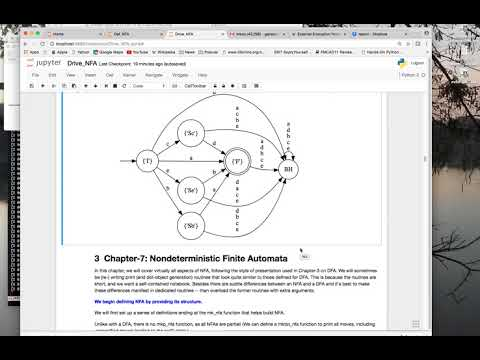

In [84]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('xjFtLF95uBc')

In [85]:
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *

In [86]:
# Our automd markdown works for NFA also. Here is the NFA for
# the language "ends in 0101"

nfa_ends0101 = md2mc('''
!!---------------------------------------------------------------------------
!! This NFA looks for patterns of the form 
!!
!!     ......<some 0's and 1's>.....0101
!!
!! i.e., all strings that end in 0101.
!!
!! This example (over and above thirdlastis1.nfa) also illustrates
!! the power of nondeterminism. Anytime we see a 0 from state I, we
!! can have the NFA speculate that it is seeing the beginning of a
!! 0101 pattern! If the NFA fails in its guess, it pays no price
!! (because another guess is soon coming from behind).
!!
!! * We take 4 states in the NFA solution. The DFA solution takes
!!   5 states.
!!
!! * This shows how burden is shifted from the
!!   human to the computer doing the NFA simulation.
!!   Even though the savings in states is not dramatic,
!!   the effort to build this NFA is much lower than building
!!   the corresponding DFA.
!! 
!!-----------------------------------------------------------------
!! For NFA, each line can be as follows:
!!
!! State : in1 | in2 ...  ->  COmma, Separated, State, List  !! comment
!!-----------------------------------------------------------------

NFA

I    : 1   -> I      !! I goes to I upon 1

I    : 0   -> S0, I  !! I goes to S0 and I upon 0

S0   : 1   -> S01    !! S0 goes to S01 upon 1

S01  : 0   -> S010   !! S01 goes to S010 upon 0

S010 : 1   -> F      !! S010 goes to F upon F

!!---
''')

In [87]:
nfa_ends0101

{'Delta': {('I', '0'): {'I', 'S0'},
  ('I', '1'): {'I'},
  ('S0', '1'): {'S01'},
  ('S01', '0'): {'S010'},
  ('S010', '1'): {'F'}},
 'F': {'F'},
 'Q': {'F', 'I', 'S0', 'S01', 'S010'},
 'Q0': {'I'},
 'Sigma': {'0', '1'}}

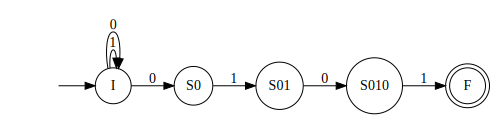

In [88]:
dotObj_nfa(nfa_ends0101)

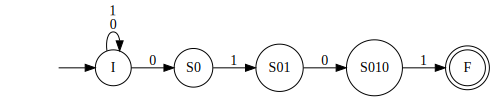

In [89]:
dotObj_nfa(nfa_ends0101, FuseEdges=True)

# NFA in "raw" format

You never need to specify NFA 

In [16]:
NFA_fig61ab = { 'Q': {'I', 'S0', 'S1', 'S2', 'F'},
                'Sigma': {'0', '1'},
                'Delta': { # 
                             ('I', '0')  : {'I'},
                             ('I', '1')  : {'I', 'S0'},
                             ('I', '')   : {'S0'},
                             #
                             ('S0', '1') : {'S1'},
                             #
                             ('S1', '0') : {'S2'},
                             ('S1', '1') : {'S2'},
                             #
                             ('S2', '0') : {'F'},
                             ('S2', '1') : {'F'},
               },
                  'Q0': {'I'}, 
                  'F' : {'F'}   
                }
NFA_fig61ab

{'Delta': {('I', ''): {'S0'},
  ('I', '0'): {'I'},
  ('I', '1'): {'I', 'S0'},
  ('S0', '1'): {'S1'},
  ('S1', '0'): {'S2'},
  ('S1', '1'): {'S2'},
  ('S2', '0'): {'F'},
  ('S2', '1'): {'F'}},
 'F': {'F'},
 'Q': {'F', 'I', 'S0', 'S1', 'S2'},
 'Q0': {'I'},
 'Sigma': {'0', '1'}}

In [17]:
step_nfa(NFA_fig61ab, "I", "")

{'S0'}

In [18]:
step_nfa(NFA_fig61ab, "I", "0")

{'I'}

In [19]:
step_nfa(NFA_fig61ab, "I", "1")

{'I', 'S0'}

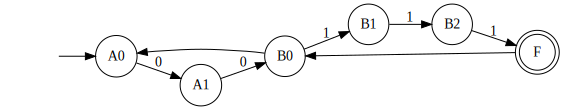

In [20]:
# NFA for ((aa)+(bbb)+)+
NFA23 = { 'Q': {'A0','A1','B0','B1','B2','F'},
          'Sigma': {'0', '1'},
          'Delta': { # 
                     ('A0', '0') : {'A1'},
                     ('A1', '0') : {'B0'},
                     #
                     ('B0', '')  : {'A0'},
                     #
                     ('B0', '1') : {'B1'},
                     ('B1', '1') : {'B2'},
                     ('B2', '1') : {'F'},
                     # 
                     ('F', '')   : {'B0'},
                   },
          'Q0': {'A0'}, 
          'F' : {'F'}   
        }
Source(dot_nfa(NFA23))

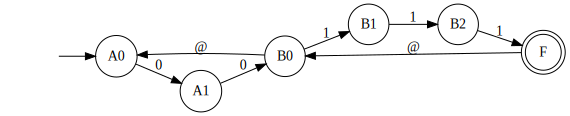

In [21]:
Source(dot_nfa(NFA23, visible_eps=True))

In [22]:
NFA23["Q0"]

{'A0'}

In [23]:
run_nfa(NFA23, NFA23["Q0"], '0', True)

States reached =  {'A1'}


{'A1'}

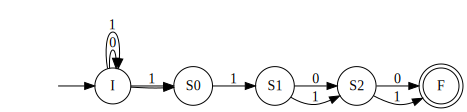

In [24]:
Source(dot_nfa(NFA_fig61ab))

In [25]:
run_nfa(NFA23, set({'A0'}), '', True)

{'A0'}

In [26]:
Eclosure(NFA_fig61ab, {"I"})

{'I', 'S0'}

In [27]:
Eclosure(NFA_fig61ab, {"S0"})

{'S0'}

In [28]:
run_nfa(NFA_fig61ab,{"I"},"")

{'I', 'S0'}

In [29]:
run_nfa(NFA_fig61ab,{"I"},"", True)

{'I', 'S0'}

In [30]:
run_nfa(NFA_fig61ab,{"I"},"0")

{'I', 'S0'}

In [31]:
run_nfa(NFA_fig61ab,{"I"},"1")

{'I', 'S0', 'S1'}

In [32]:
run_nfa(NFA_fig61ab,{"I"},"100")

{'F', 'I', 'S0'}

In [33]:
run_nfa(NFA_fig61ab,{"I"},"100", True)

States reached =  {'S1', 'I', 'S0'}
States reached =  {'I', 'S2', 'S0'}
States reached =  {'I', 'S0', 'F'}


{'F', 'I', 'S0'}

In [34]:
run_nfa(NFA_fig61ab,{"I"},"00110")

{'F', 'I', 'S0', 'S2'}

In [35]:
run_nfa(NFA_fig61ab,{"I"},"00110", True)

States reached =  {'I', 'S0'}
States reached =  {'I', 'S0'}
States reached =  {'S1', 'I', 'S0'}
States reached =  {'S0', 'S1', 'S2', 'I'}
States reached =  {'S0', 'S2', 'F', 'I'}


{'F', 'I', 'S0', 'S2'}

In [36]:
accepts_nfa(NFA_fig61ab, "")

False

In [37]:
accepts_nfa(NFA_fig61ab, "", True)

NFA rejects ''


False

In [38]:
accepts_nfa(NFA_fig61ab, "0", True)

States reached =  {'I', 'S0'}
NFA rejects '0'


False

In [39]:
accepts_nfa(NFA_fig61ab, "100", True)

States reached =  {'S1', 'I', 'S0'}
States reached =  {'I', 'S2', 'S0'}
States reached =  {'I', 'S0', 'F'}
NFA accepts '100' by reaching {'I', 'S0', 'F'}


True

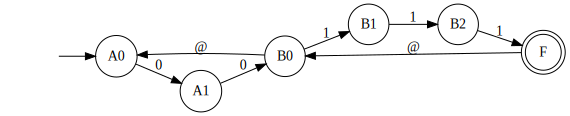

In [40]:
dotObj_nfa(NFA23, visible_eps=True, nfaName="NFA23")

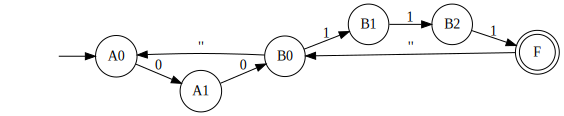

In [41]:
dotObj_nfa(NFA23, visible_eps=False, nfaName="NFA23")

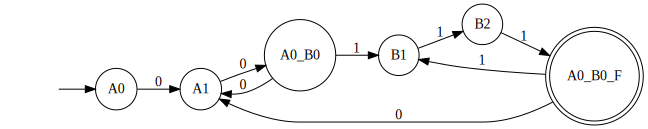

In [42]:
n2DFA23 = nfa2dfa(NFA23)
dotObj_dfa(n2DFA23, "n2dNFA23")

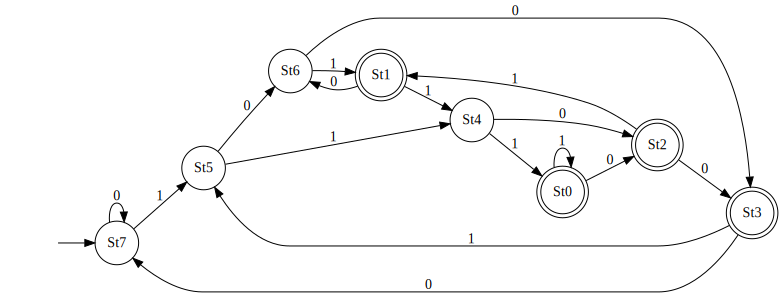

In [43]:
n2DFA61 = nfa2dfa(NFA_fig61ab)
dotObj_dfa(n2DFA61, "n2dNFA_fig61ab")

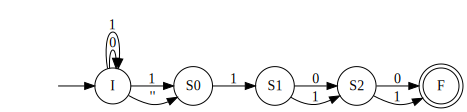

In [44]:
dotObj_nfa(NFA_fig61ab,visible_eps=False,nfaName="NFA_fig61ab")

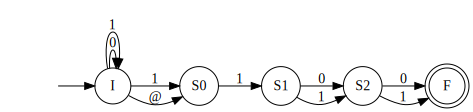

In [45]:
dotObj_nfa(NFA_fig61ab,visible_eps=True,nfaName="NFA_fig61ab")

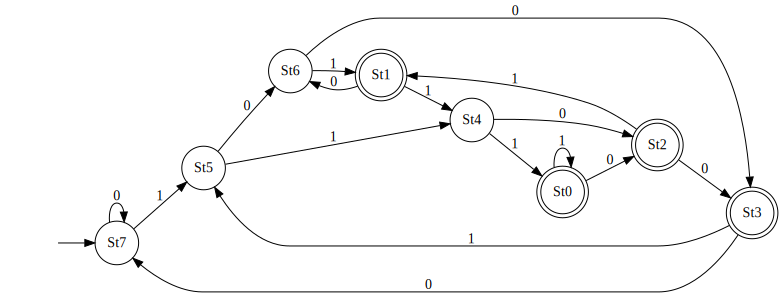

In [46]:
dotObj_dfa(nfa2dfa(NFA_fig61ab), 'n1')

# Brzozowski's DFA Minimization

Picking up from our earlier discussions, to minimize a DFA using Brzozowski's algorithm, here are the steps:

* Make sure that the given DFA has no unreachable states
* Reverse the DFA
* Determinize it
* Reverse that DFA
* Determinize it

Thus we need to write a routine to reverse a DFA. We already have a way to ensure that a DFA does not have unreachable states (in another Jupyter notebook; we won't bother to include it here, and trust the user to always provide such DFA only).

We can observe that if a DFA has black-hole states, then those states won't matter in the reversed machine (reversed NFA). Thus, we can work with __partial__ dfa (i.e., DFA that are partially consistent).

## DFA reversal

In [47]:
def inSets(D,trg,ch):
    """In : D   = partially consistent dfa,
            trg = a target state in D["q"]
            ch  = a member of D["Sigma"]
       Out: a set of states. { q s.t. Delta[q,ch] == trg }
    """
    return { q for q in D["Q"] if D["Delta"][(q,ch)] == trg }

def rev_dfa(D):
    """In : D = a partially consistent DFA without any unreachable states.
       Out: A consistent NFA whose language is D's language reversed.
    """
    # 1. Given that NFAs start from a SET of states, we already have that
    #   info. No need to add any transitions from "a new initial state" 
    #   etc
    
    # 2. Now add the inSets of each state as the NFA next set of states
    NDict = { (q,ch) : inSets(D,q,ch) 
              for q in D["Q"] 
              for ch in D["Sigma"] }
    
    # Notice that we retain D["Q"] and start from Q0 = D["F"]
    # going backwards along NDict toward F_dfa = { D["q0"] }
    return mk_nfa(D["Q"], D["Sigma"], NDict, D["F"], {D["q0"]})

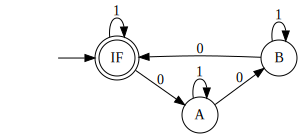

In [48]:
DFA34 = { 'Q': {'A', 'IF', 'B'},
          'Sigma': {'0', '1'},
          'Delta': { ('IF', '0'): 'A',
                     ('IF', '1'): 'IF',
                     ('A', '0'): 'B',
                     ('A', '1'): 'A',
                     ('B', '0'): 'IF',
                     ('B', '1'): 'B' },
          'q0': 'IF', 
          'F': {'IF'}   
        }
dotObj_dfa(DFA34, "DFA34")

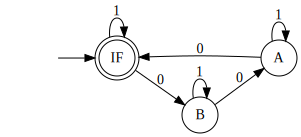

In [49]:
DFA34_rev = rev_dfa(DFA34)
dotObj_nfa(DFA34_rev, "DFA34_rev")

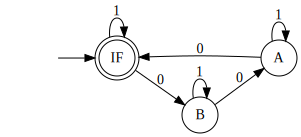

In [50]:
DFA34_rev_det = nfa2dfa(DFA34_rev)
dotObj_dfa(DFA34_rev_det, "DFA34_rev_det")

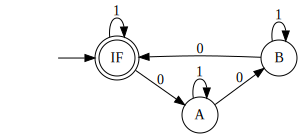

In [51]:
DFA34_rev_det_rev = rev_dfa(DFA34_rev_det)
dotObj_nfa(DFA34_rev_det_rev, "DFA34_rev_det_rev")

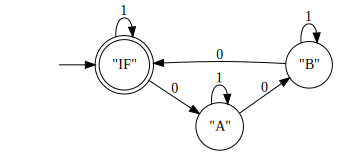

In [52]:
DFA34_rev_det_rev_det = nfa2dfa(DFA34_rev_det_rev)
dotObj_dfa(DFA34_rev_det_rev_det, "DFA34_rev_det_rev_det")

__TRY NEW EXAMPLE HERE__

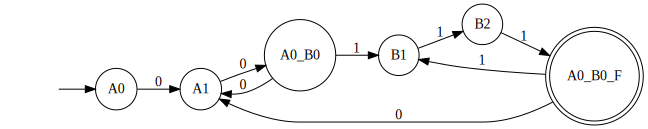

In [53]:
dotObj_dfa(n2DFA23, "n2DFA23")

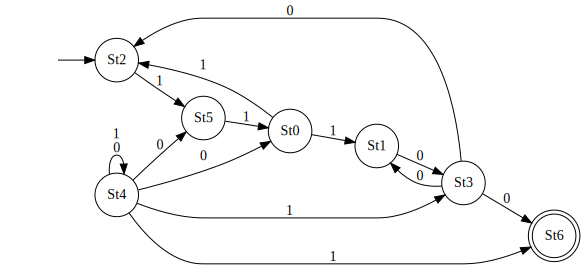

In [54]:
rev_n2DFA23 = rev_dfa(n2DFA23)
dotObj_nfa(rev_n2DFA23, "rev23")

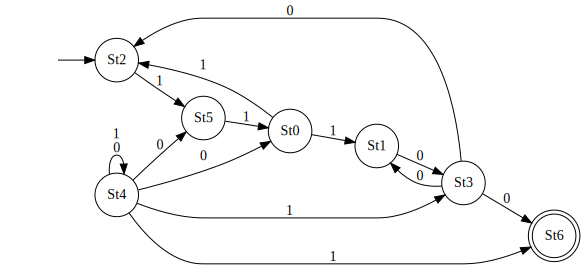

In [55]:
det_rev_n2DFA23 = nfa2dfa(rev_dfa(n2DFA23))
dotObj_nfa(rev_n2DFA23, "rev23")

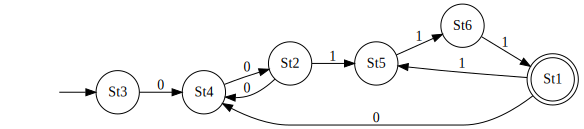

In [56]:
n2DFA23
dotObj_dfa(nfa2dfa(rev_dfa(nfa2dfa(rev_dfa(n2DFA23)))), "rdrd")

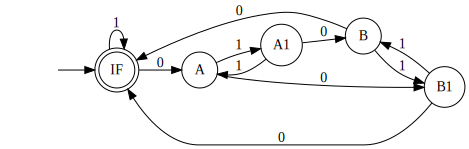

In [57]:
D34bl = { 'Q': {'A', 'IF', 'B', 'A1', 'B1'},
          'Sigma': {'0', '1'},
          'Delta': { ('IF', '0'): 'A',
                     ('IF', '1'): 'IF',
                     ('A', '0'): 'B1',
                     ('A', '1'): 'A1',
                     ('A1', '0'): 'B',
                     ('A1', '1'): 'A',
                     ('B1', '0'): 'IF',
                     ('B1', '1'): 'B',
                     ('B','0') : 'IF',
                     ('B', '1'): 'B1' },
          'q0': 'IF', 
          'F': {'IF'}   
        }

dotObj_dfa(D34bl, "D34bl")

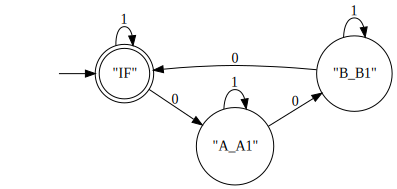

In [58]:
dotObj_dfa(nfa2dfa(rev_dfa(nfa2dfa(rev_dfa(D34bl)))), "D34bl_rdrd")

In [59]:
nfaMultiQ0 = md2mc('''
NFA
I0 : a | b | c -> A, B
I0 : c -> F
I1 : a | b -> A, B
A  : c -> F
B  : d -> F
''')

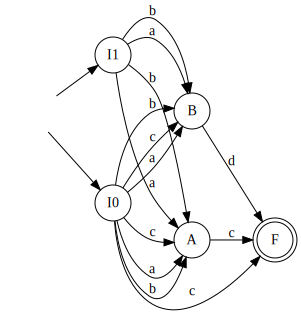

In [60]:
dotObj_nfa(nfaMultiQ0)

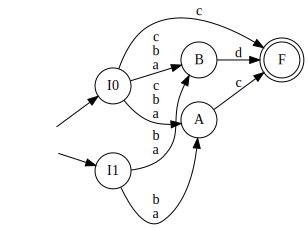

In [61]:
dotObj_nfa(nfaMultiQ0, FuseEdges=True)

In [62]:
dfaMQ0 = nfa2dfa(nfaMultiQ0)

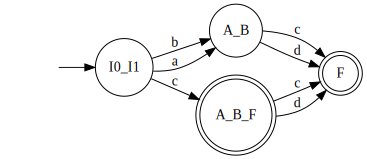

In [63]:
dotObj_dfa(dfaMQ0)

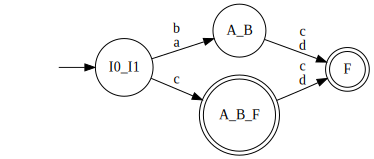

In [64]:
dotObj_dfa(dfaMQ0, FuseEdges=True)

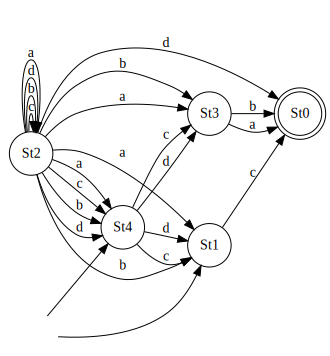

In [65]:
dotObj_nfa(rev_dfa(dfaMQ0))

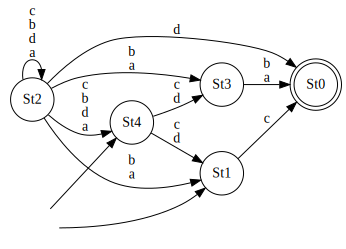

In [66]:
dotObj_nfa(rev_dfa(dfaMQ0), FuseEdges=True)

In [67]:
help(min_dfa_brz)

Help on function min_dfa_brz in module jove.Def_NFA:

min_dfa_brz(D)
    Minimize a DFA as per Brzozowski's algorithm.



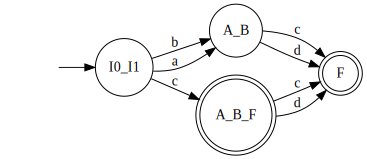

In [68]:
dotObj_dfa(dfaMQ0)

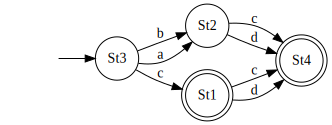

In [69]:
dotObj_dfa(min_dfa_brz(dfaMQ0))

In [70]:
thirdlast1alt = md2mc('''
NFA
I : 0   -> I    !! On input 0 in the init state I, stay in I
                !! On input 1, fork two paths, one staying in I
                !! and the other going to state A.
I : 1   -> I,A  !! Threads that land in state A must enter 
                !! the final state in two more steps. 
A : 0|1 -> B    !! A move out of F kills this speculative 
B : 0|1 -> F    !! token, but more tokens may be on their way
''')

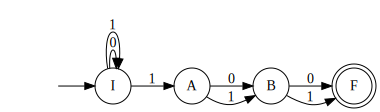

In [71]:
dotObj_nfa(thirdlast1alt)

In [72]:
blimp = md2mc('''
DFA 
I1 : a -> F2
I1 : b -> F3
F2 : a -> S8
F2 : b -> S5
F3 : a -> S7
F3 : b -> S4
S4 : a | b -> F6
S5 : a | b -> F6
F6 : a | b -> F6
S7 : a | b -> F6
S8 : a -> F6
S8 : b -> F9
F9 : a -> F9
F9 : b -> F6
''')

In [73]:
DOblimp = dotObj_dfa(blimp)

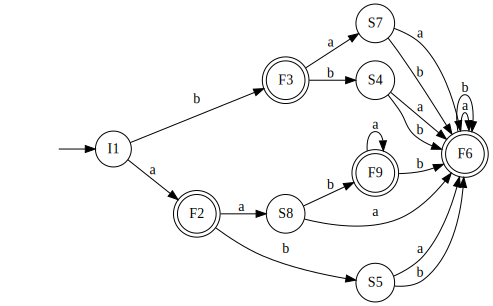

In [74]:
DOblimp

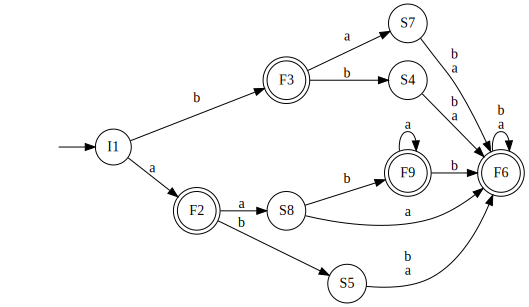

In [75]:
dotObj_dfa(blimp, True)

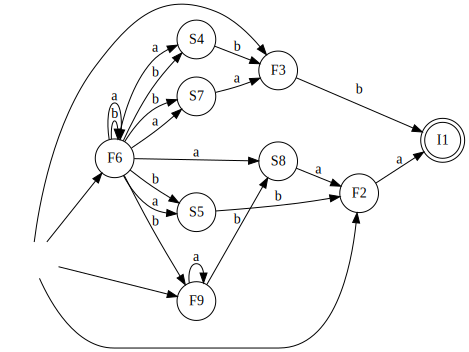

In [76]:
rblimp = rev_dfa(blimp)
DOrblimp = dotObj_nfa(rblimp)
DOrblimp

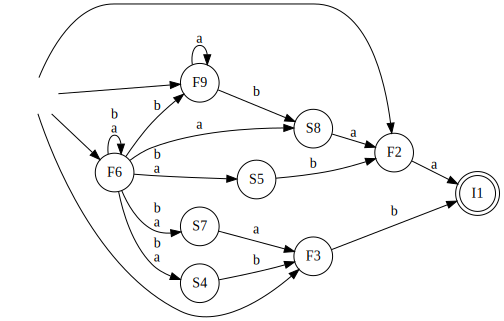

In [77]:
dotObj_nfa(rblimp, FuseEdges=True)

In [78]:
DOrblimp.source

'// NO_St28\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tS7 [label=S7 peripheries=1 shape=circle]\n\t\tS8 [label=S8 peripheries=1 shape=circle]\n\t\tF9 [label=F9 peripheries=1 shape=circle]\n\t\tF3 [label=F3 peripheries=1 shape=circle]\n\t\tF6 [label=F6 peripheries=1 shape=circle]\n\t\tS4 [label=S4 peripheries=1 shape=circle]\n\t\tS5 [label=S5 peripheries=1 shape=circle]\n\t\tF2 [label=F2 peripheries=1 shape=circle]\n\t\tI1 [label=I1 peripheries=2 shape=circle]\n\t\t\tEMPTY -> F9\n\t\t\tEMPTY -> F6\n\t\t\tEMPTY -> F3\n\t\t\tEMPTY -> F2\n\t\t\tS7 -> F3 [label=a]\n\t\t\tS8 -> F2 [label=a]\n\t\t\tF9 -> S8 [label=b]\n\t\t\tF9 -> F9 [label=a]\n\t\t\tF3 -> I1 [label=b]\n\t\t\tF6 -> S7 [label=b]\n\t\t\tF6 -> F9 [label=b]\n\t\t\tF6 -> S4 [label=b]\n\t\t\tF6 -> S5 [label=b]\n\t\t\tF6 -> F6 [label=b]\n\t\t\tF6 -> S7 [label=a]\n\t\t\tF6 -> S8 [label=a]\n\t\t\tF6 -> S4 [label=a]\n\t\t\tF6 -> S5 [label=a]\n\t\t\tF6 -> F6 [label=a]\n\t\t\tS4 -> F3 [label=b]\n\t\t\tS5 -

In [79]:
drblimp = nfa2dfa(rblimp)
drblimp

{'Delta': {('St0', 'a'): 'St0',
  ('St0', 'b'): 'St0',
  ('St1', 'a'): 'St0',
  ('St1', 'b'): 'St0',
  ('St2', 'a'): 'St3',
  ('St2', 'b'): 'St3',
  ('St3', 'a'): 'St1',
  ('St3', 'b'): 'St1'},
 'F': {'St0', 'St3'},
 'Q': {'St0', 'St1', 'St2', 'St3'},
 'Sigma': {'a', 'b'},
 'q0': 'St2'}

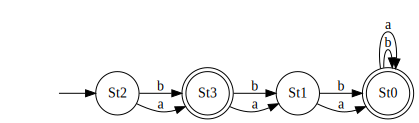

In [80]:
DOdrblimp = dotObj_dfa(drblimp)
DOdrblimp

In [81]:
DOdrblimp.source

'// do_St30\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tSt2 [label=St2 peripheries=1 shape=circle]\n\t\tSt1 [label=St1 peripheries=1 shape=circle]\n\t\tSt3 [label=St3 peripheries=2 shape=circle]\n\t\tSt0 [label=St0 peripheries=2 shape=circle]\n\t\t\tEMPTY -> St2\n\t\t\tSt2 -> St3 [label=b]\n\t\t\tSt2 -> St3 [label=a]\n\t\t\tSt3 -> St1 [label=b]\n\t\t\tSt3 -> St1 [label=a]\n\t\t\tSt1 -> St0 [label=b]\n\t\t\tSt1 -> St0 [label=a]\n\t\t\tSt0 -> St0 [label=b]\n\t\t\tSt0 -> St0 [label=a]\n}'

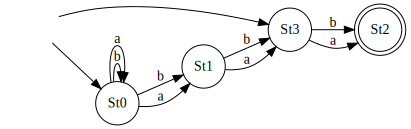

In [82]:
rdrblimp = rev_dfa(drblimp)
DOrdrblimp = dotObj_nfa(rdrblimp)
DOrdrblimp

In [83]:
DOrdrblimp.source

'// NO_St31\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tSt3 [label=St3 peripheries=1 shape=circle]\n\t\tSt1 [label=St1 peripheries=1 shape=circle]\n\t\tSt0 [label=St0 peripheries=1 shape=circle]\n\t\tSt2 [label=St2 peripheries=2 shape=circle]\n\t\t\tEMPTY -> St3\n\t\t\tEMPTY -> St0\n\t\t\tSt1 -> St3 [label=b]\n\t\t\tSt1 -> St3 [label=a]\n\t\t\tSt0 -> St1 [label=b]\n\t\t\tSt0 -> St0 [label=b]\n\t\t\tSt0 -> St1 [label=a]\n\t\t\tSt0 -> St0 [label=a]\n\t\t\tSt3 -> St2 [label=b]\n\t\t\tSt3 -> St2 [label=a]\n}'

In [ ]:
drdrblimp = nfa2dfa(rdrblimp)
DOdrdrblimp = dotObj_dfa(drdrblimp)
DOdrdrblimp

In [ ]:
DOdrdrblimp.source

In [ ]:
nfahas01 = md2mc('''
NFA 
I : 0 | 1 -> I
I : '' -> A
A : 0  -> B
B : 1  -> C
C : 0 | 1 -> C
C : '' -> F
''')
DOhas01 = dotObj_nfa(nfahas01)
DOhas01

In [ ]:
dfahas01 = nfa2dfa(nfahas01)
DOdfahas01 = dotObj_dfa(dfahas01)
DOdfahas01